<a href="https://colab.research.google.com/github/minhviet178/Boston_Housing_Prices/blob/main/5_7_WeeklyProject_BostonHouse_TMV_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(2)
np.random.normal(size = 5)

array([-0.41675785, -0.05626683, -2.1361961 ,  1.64027081, -1.79343559])

In [ ]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
def vietbeo(x):
    return x+1

vietbeo(1)

2

# Weekly Project: Predicting Boston Housing prices

In this project, you will create, evaluate the performance and predictive power of your model on data collected from homes in suburbs of Boston, Massachusetts

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. **Data preprocessing has been applied to your dataset**. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Your task is to apply a machine learning model of your choice to predict the price of houses in a Boston neighborhood (which is column 'MEDV')


The dataset can be accessed here: https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv


Here are the few steps you can follow



# Step 1: Data Exploration (EDA)

Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**Question**: For each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.



### Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import cross_val_score

### EDA

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv')

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


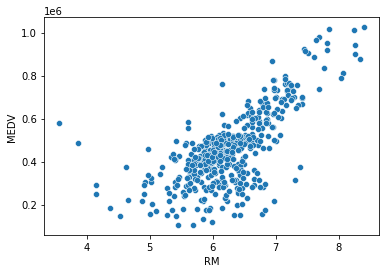

In [ ]:
sns.scatterplot(data = df,
                x = 'RM',
                y = 'MEDV')

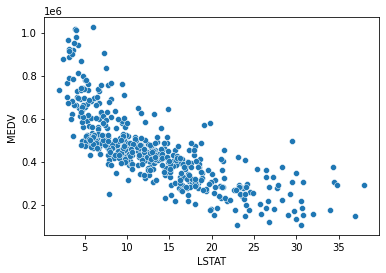

In [ ]:
sns.scatterplot(data = df,
                x = 'LSTAT',
                y = 'MEDV')

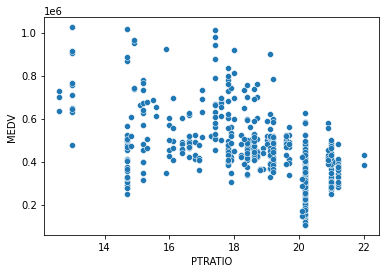

In [ ]:
sns.scatterplot(data = df,
                x = 'PTRATIO',
                y = 'MEDV')

# Step 2: Get to know our performance Metric

Do a quick read on R2 score, because that is going to be the metric we are going to use for this task.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

**Question**: what is the range of R2? How can we know if a model performs well or not by using R2 score?
- Maximum score is 1.0
- Can be negative

**Question**: Calculate R2 score on these data points
```python
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
```
If a model is making these prediction (y_pred), is this a good model?

In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
r2_score(y_true, y_pred)

0.9228556485355649

# Step 3: Train our machine learning model

There won't be much guidance for this step. Your task is to pick and train a machine learning model on this dataset to predict the house price. Make sure to follow all the recommended practices we mention in class. And make sure to finetune your model and pick the best set of hyperparameters (using cross_val_score)


Bonus part: if you want to make your whole finetuning model painless, take a look at GridSearchCV. Read the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, and user guide here: https://scikit-learn.org/stable/modules/grid_search.html#grid-search



In [ ]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(df.drop(columns = 'MEDV'))

## GridSearchCV training

### Perform GridSearchCV using KNN Regression Model


In [ ]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor()
clf = GridSearchCV(model, {
                    'n_neighbors' : range(1,50),
                    }, cv = 5, return_train_score = False)
clf.fit(X_transformed, df['MEDV'])
clf.cv_results_
df_KNN = pd.DataFrame(clf.cv_results_)
df_KNN[['param_n_neighbors','mean_test_score']].head()

,param_n_neighbors,mean_test_score
0,1,0.420851
1,2,0.588743
2,3,0.634990
3,4,0.644538
4,5,0.649551


In [ ]:
print('Best params', clf.best_params_)
print('Best score', clf.best_score_)

Best params {'n_neighbors': 10}
Best score 0.6669826235080667


### Perform GridsearCV using multiple models

In [ ]:
model_params = {
    'KNN Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors' : range(1,50)
        }
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2]
        }
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2]
        }
    },
    'Elastic Net Regression':{
        'model': ElasticNet(),
        'params': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2]
        }       
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],
                    cv = 5, return_train_score = False, scoring = 'r2')
    clf.fit(X_transformed, df['MEDV'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Step 4: Reporting your R2 score

Record your best R2 score here (from cross validation score). If you perform train/test split, record your R2 score on test set here as well.

Here I decide to go with KNN Regression

In [ ]:
df_test = pd.DataFrame(scores)
df_test
# Choose KNN Regression

,model,best_score,best_params
0,KNN Regression,0.666983,{'n_neighbors': 10}
1,Lasso Regression,0.423774,{'alpha': 0.0001}
2,Ridge Regression,0.424422,{'alpha': 2}
3,Elastic Net Regression,0.430388,{'alpha': 0.2}


# Step 5: Making predictions

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

What price would you recommend each client sell his/her home at?
Do these prices seem reasonable given the values for the respective features?

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
test_case = {'RM':[5, 4, 8], 'LSTAT': [0.17, 0.32, 0.03], 'PTRATIO': [15, 22, 12]}
df_test = pd.DataFrame(test_case)
df_test

,RM,LSTAT,PTRATIO
0,5,0.17,15
1,4,0.32,22
2,8,0.03,12


In [ ]:
KNN_Reg = KNeighborsRegressor(n_neighbors=10)
KNN_Reg.fit(X_transformed, df['MEDV'])

# Predict 
y_test_pred = KNN_Reg.predict(df_test)
y_test_pred 
# r2_score(y_test, y_test_pred)

array([458220., 417270., 527730.])

### Predictions for all clients
Client 1: 458220

Client 2: 417270

Client 3: 527730

# Step 6: Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

- How relevant today is data that was collected from 1978? How important is inflation?

`The cumulative rate of Inflation since 1978 to 2021 is nearly 2600%, so anything cost a dollar back then would cost us almost 27 dollars in 2020. So the data in 1978 has to be adjusted for inflation to be used nowdays.`

- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

`After trying 4 ML models, all 4 of them got a very low cross validation score. While it could be the model's problem, the features are certainly insufficient to describe the price of a home. There are way more features that are more relevant for a house's price such as the area of the house in square foot, the number of bedrooms, toilets, bathrooms.`

- Is the model robust enough to make consistent predictions?

`The model only has around 66% cv 5 score so definitely not consistent enough.` 

- Would data collected in an urban city like Boston be applicable in a rural city?

`No, duh.`

- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

`It is fair to an extent, since a poorer neighbourhood may have cheaper house. However, that's only an assumption that we made. As i said earlier, more features must be taken into account for the model to be more effective at recommending house prices.`